<a href="https://colab.research.google.com/github/ishaanbarde/Covid-19-Detection-Using-Machine-Learning/blob/main/Covid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/2hm9hhyzex5astp/CovidDataset.zip?dl=0

--2023-03-20 03:02:50--  https://www.dropbox.com/s/2hm9hhyzex5astp/CovidDataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2hm9hhyzex5astp/CovidDataset.zip [following]
--2023-03-20 03:02:50--  https://www.dropbox.com/s/raw/2hm9hhyzex5astp/CovidDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc904c2288b6725a60bfa0557d24.dl.dropboxusercontent.com/cd/0/inline/B4mtkFx0FaRQH5bRciN2Q_3kpuARrkI6K5uJDHELffbuVAnP7hxXh9o90HDOShRx86JtaGXJlClNx3EpWfWTLKOme9KW9Lz3bKn0jliH_iiBqzlBZm34BJNKYyZsw9GGCn5eYEb6M180bM3jMC6P5_p4n1qZ16Z4i1bcvLNnQpJW3g/file# [following]
--2023-03-20 03:02:50--  https://uc904c2288b6725a60bfa0557d24.dl.dropboxusercontent.com/cd/0/inline/B4mtkFx0FaRQH5bRciN2Q_3kpuARrkI6K5uJDHELffbuVAnP7hxXh9o90HDOShR

In [ ]:
!unzip CovidDataset.zip?dl=0

Archive:  CovidDataset.zip?dl=0
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4

In [ ]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import *
from keras.models import *

In [ ]:
#Train from scratch
train_datagen=image.ImageDataGenerator(
rescale=1/255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
)

train_data=train_datagen.flow_from_directory(
directory='/content/CovidDataset/Train',
target_size=(256,256),
batch_size=1,
class_mode='binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_datagen=image.ImageDataGenerator(
rescale=1/255
)

test_data=test_datagen.flow_from_directory(
directory="/content/CovidDataset/Val",
target_size=(256,256),
batch_size=16,
class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['acc']) 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
model.fit_generator(
train_data,
steps_per_epoch=10,
epochs=25,
validation_data=test_data,
validation_steps=2
)

<ipython-input-11-0bdff298d4b8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25
10/10 [==============================] - 9s 848ms/step - loss: 0.6019 - acc: 0.6000 - val_loss: 0.6282 - val_acc: 0.7188
Epoch 2/25
10/10 [==============================] - 10s 1s/step - loss: 0.7432 - acc: 0.6000 - val_loss: 0.5429 - val_acc: 0.9375
Epoch 3/25
10/10 [==============================] - 8s 844ms/step - loss: 0.6094 - acc: 0.8000 - val_loss: 0.6481 - val_acc: 0.7812
Epoch 4/25
10/10 [==============================] - 9s 937ms/step - loss: 0.4765 - acc: 0.9000 - val_loss: 0.6166 - val_acc: 0.7812
Epoch 5/25
10/10 [==============================] - 7s 704ms/step - loss: 0.9563 - acc: 0.7000 - val_loss: 0.5329 - val_acc: 0.8438
Epoch 6/25
10/10 [==============================] - 8s 800ms/step - loss: 0.6106 - acc: 0.5000 - val_loss: 0.6090 - val_acc: 0.7500
Epoch 7/25
10/10 [==============================] - 7s 785ms/step - loss: 0.6633 - acc: 0.7000 - val_loss: 0.6018 - val_acc: 0.8750
Epoch 8/25
10/10 [==============================] - 8s 844ms/step - loss: 0.45

(1, 256, 256, 3)

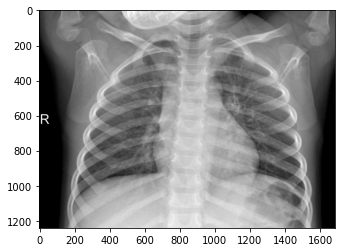

In [ ]:
path="/content/CovidDataset/Val/Normal/NORMAL2-IM-0462-0001.jpeg"
d = tf.keras.utils.load_img(path)
plt.imshow(d)
img =tf.keras.utils.load_img(path, target_size=(256,256))
img = tf.keras.utils.img_to_array(img)/255
img = np.array([img])
img.shape 

In [ ]:
y_pred = model.predict(img)
y_pred = np.round(y_pred).astype(int)
print(y_pred)

1/1 [==============================] - 0s 86ms/step
[[1]]
